# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [52]:
#install spacy in the current conda environment
!pip install spacy


In [1]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [3]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [4]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [5]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [6]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [7]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [8]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [9]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [10]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [11]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

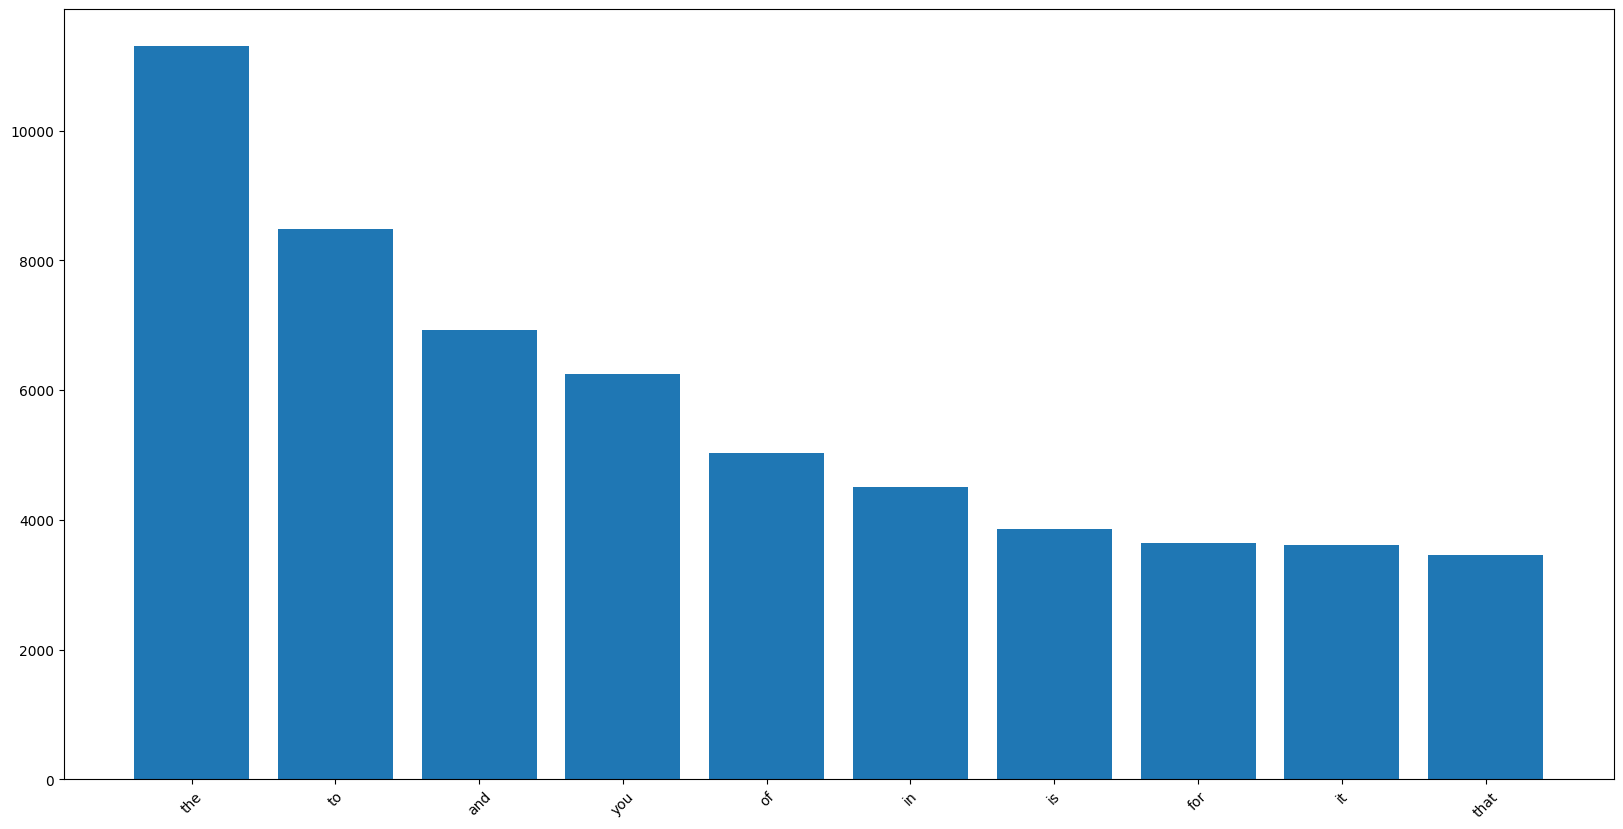

In [13]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: 

I think this is not really useful to the studying of the community, because these are common words/stopwords used in every day language. They did not have any special meanings, and so these can hardly be used to study the community. 

#### Lemmatization and stopword removal

In [14]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [15]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [16]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [17]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [18]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [19]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

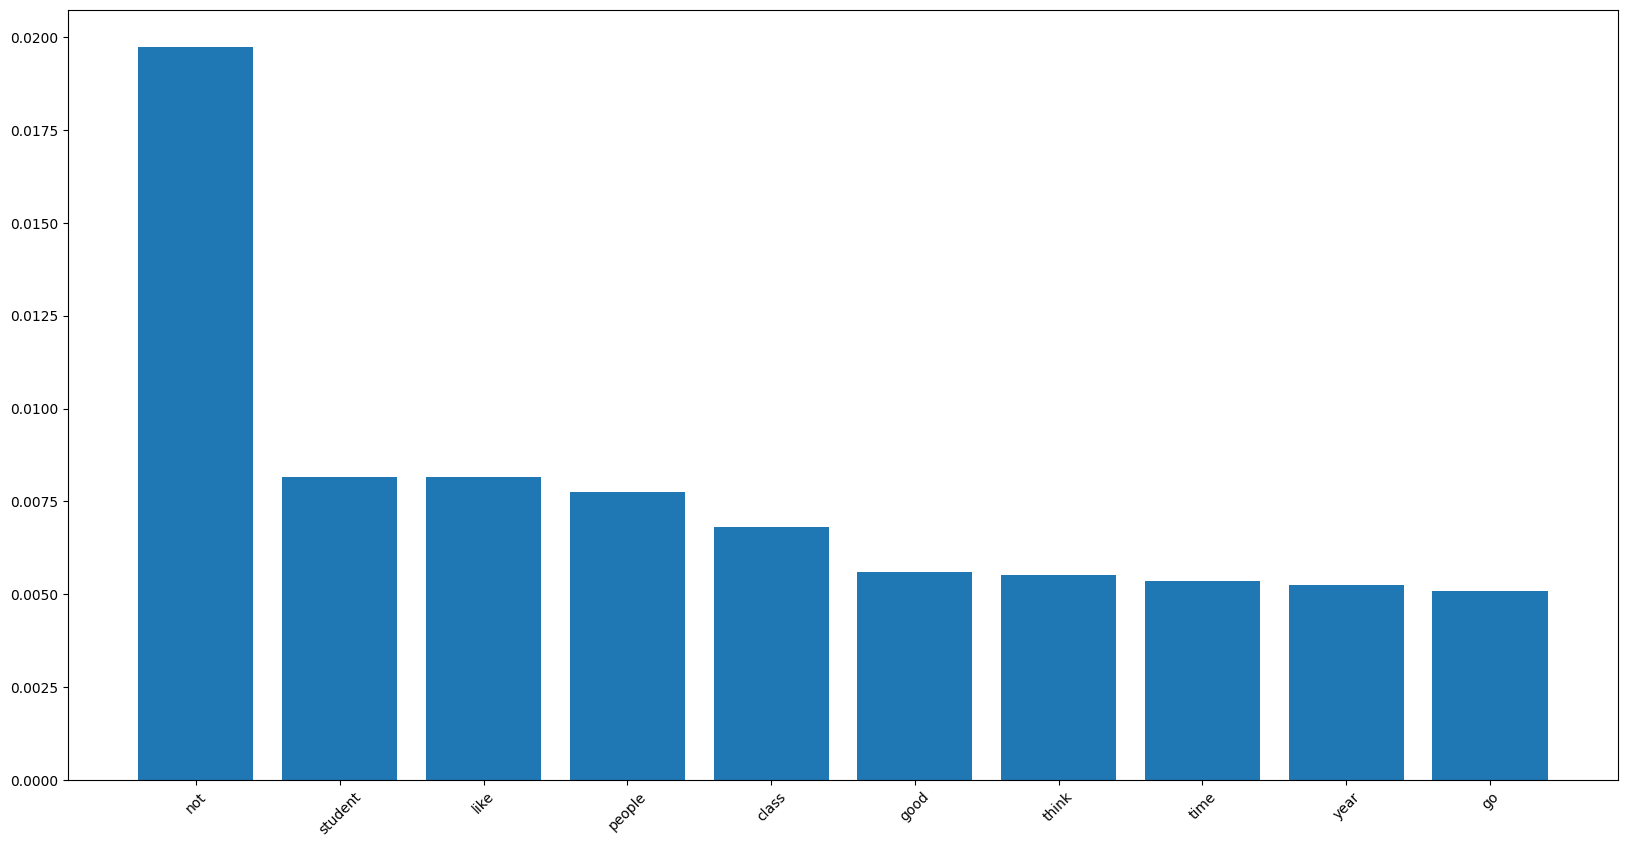

In [20]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [21]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [22]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

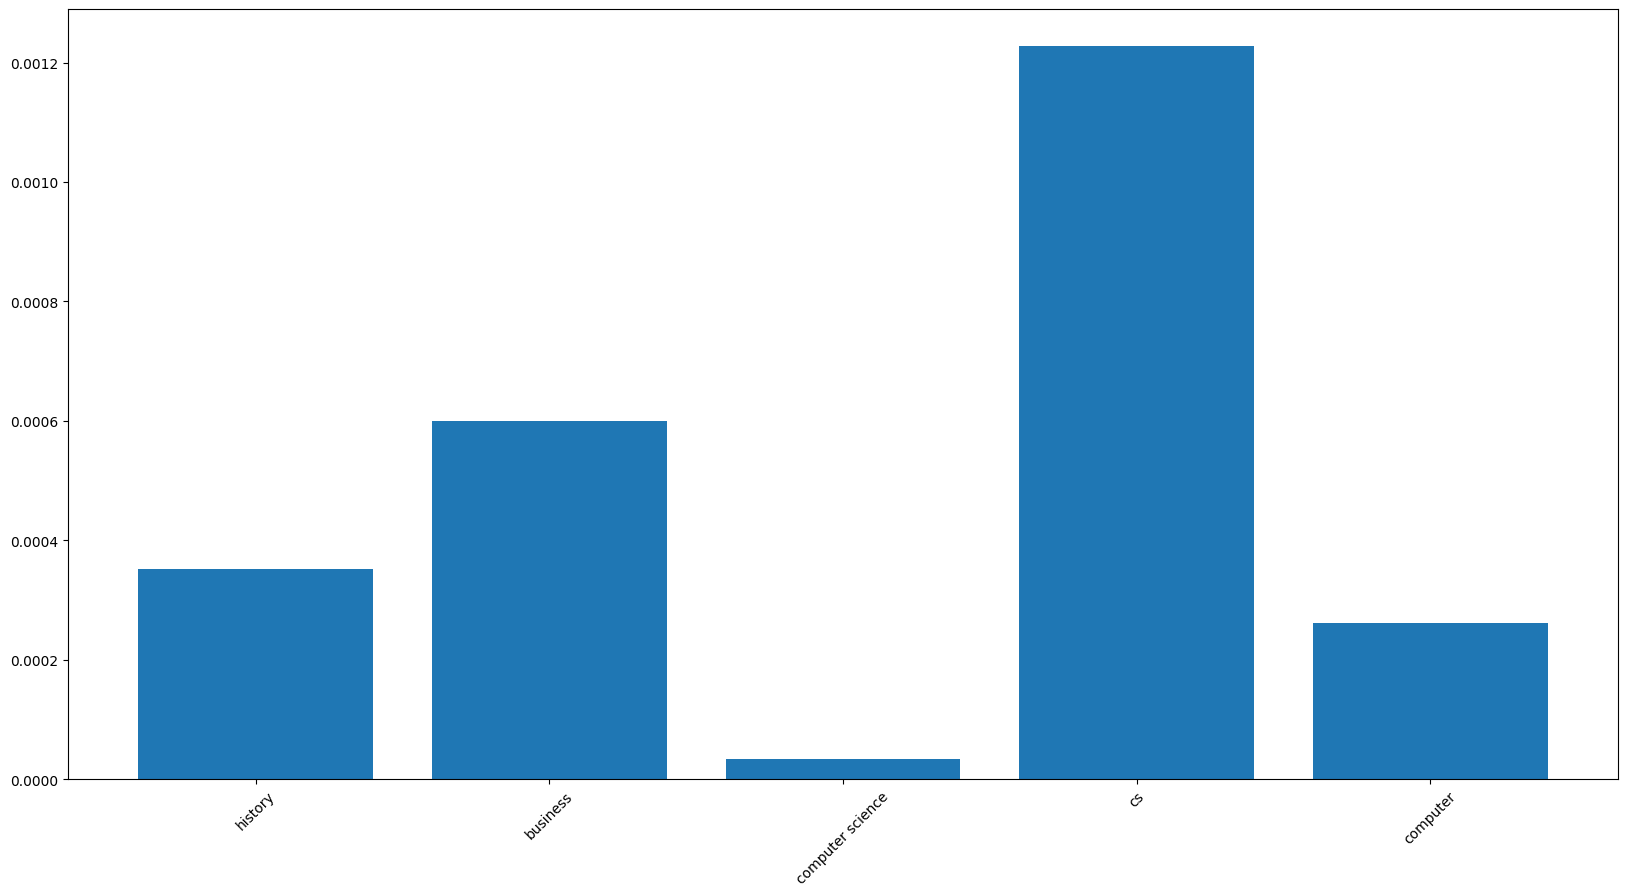

In [23]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [24]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [25]:
plot_list=word_counts[["physics", "art", "biology", "information science", "data science"]]
plot_list

physics                0.000573
art                    0.000124
biology                0.000055
information science    0.000028
data science           0.000041
dtype: float64

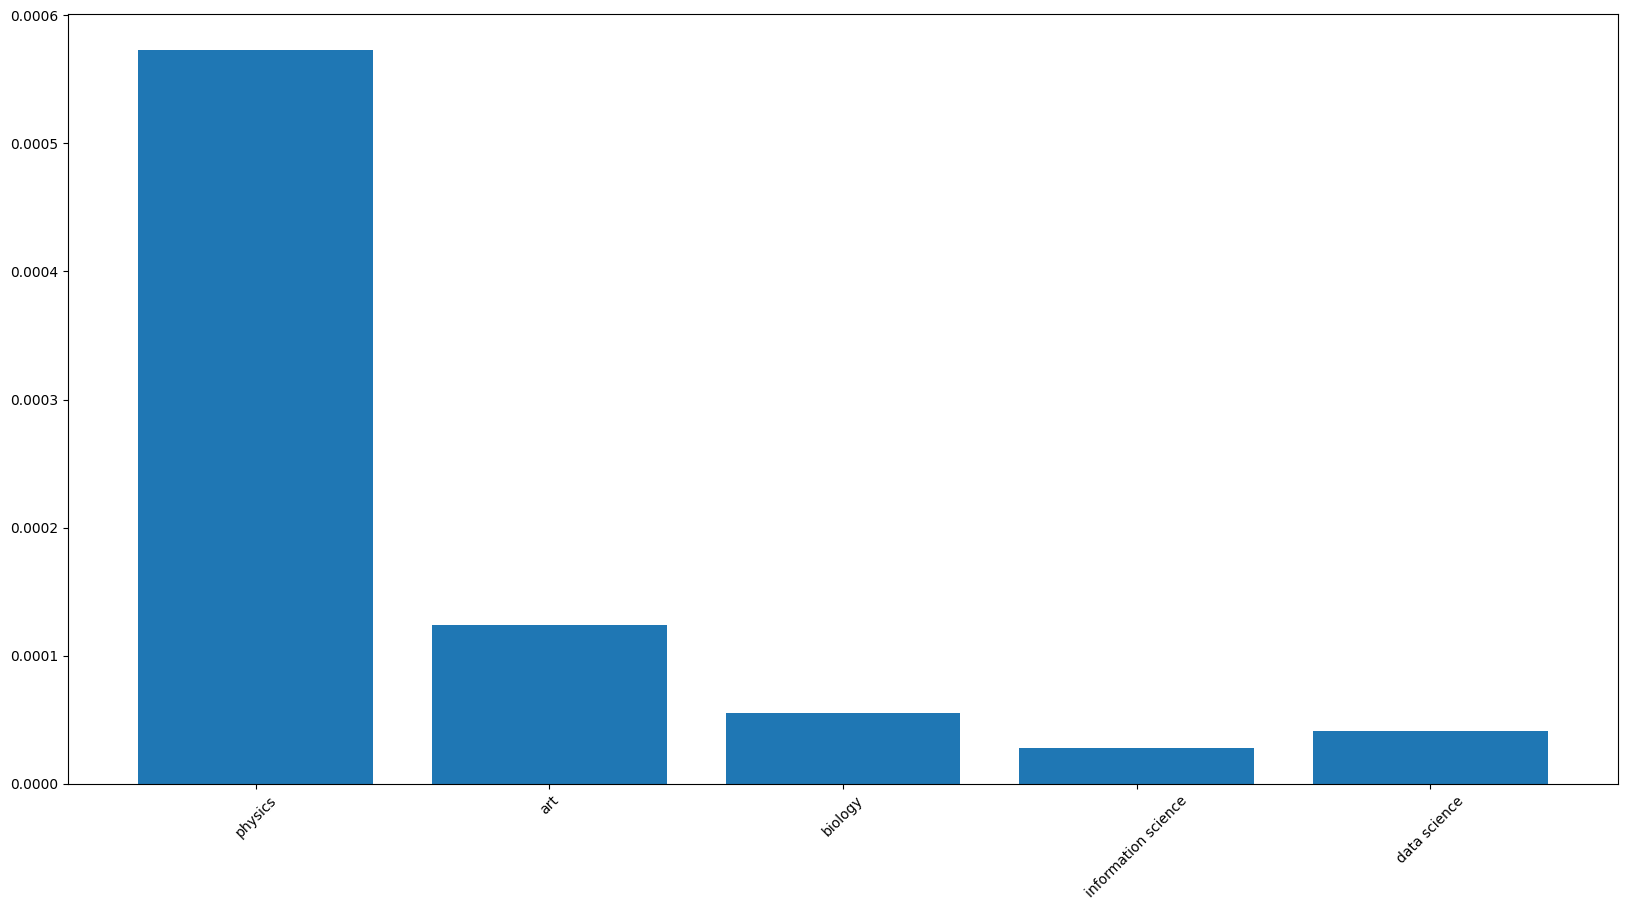

In [26]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [27]:
uiuc=pd.read_csv("uiuc.csv")


In [28]:
uiuc=pd.read_csv("uiuc.csv")
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

vectorizer = CountVectorizer()
bag_of_words_uiuc1 = vectorizer.fit_transform(uiuc['cleaned_text'])
bow_df_uiuc1 = pd.DataFrame(bag_of_words_uiuc1.toarray(), columns=vectorizer.get_feature_names_out())


word_counts_uiuc1 = bow_df_uiuc1.sum()

word_counts_uiuc1 = word_counts_uiuc1.sort_values(ascending=False)

word_counts_uiuc1

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

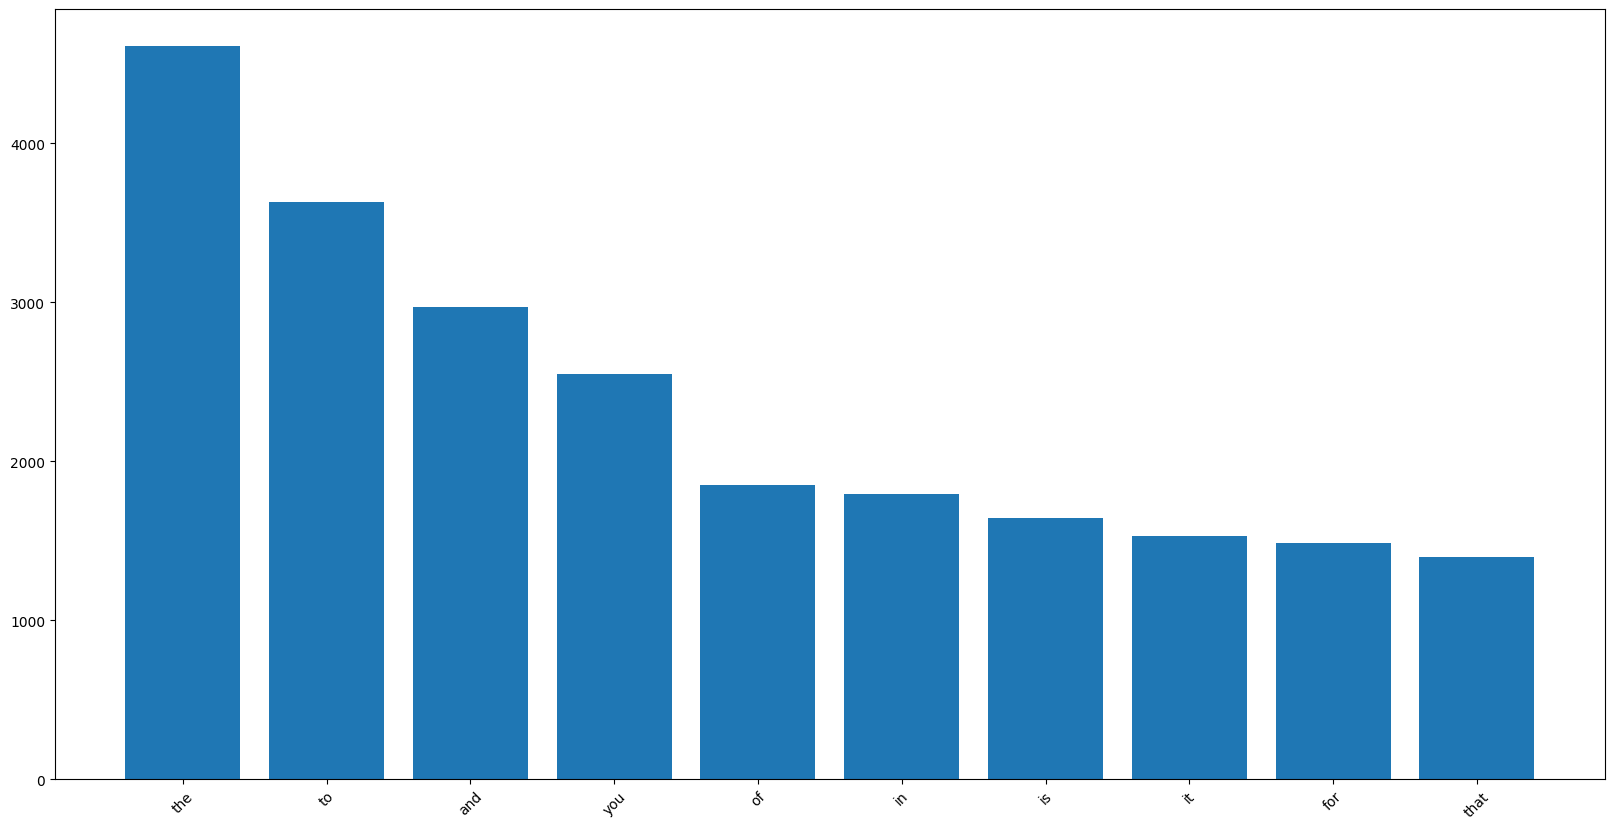

In [29]:
word_counts_uiuc1 = word_counts_uiuc1.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts_uiuc1.index, word_counts_uiuc1.values)
plt.xticks(rotation=45)
plt.show()

In [30]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words_uiuc2 = vectorizer.fit_transform(uiuc['lemmatized_text'])
bow_df_uiuc2 = pd.DataFrame(bag_of_words_uiuc2.toarray(), columns=vectorizer.get_feature_names_out())


word_counts_uiuc2 = bow_df_uiuc2.sum()

word_counts_uiuc2 = word_counts_uiuc2.sort_values(ascending=False)

word_counts_uiuc2

not          1205
like          534
people        481
good          389
time          376
             ... 
mask sick       3
marville        3
markdown        3
maps            3
luckily         3
Length: 3882, dtype: int64

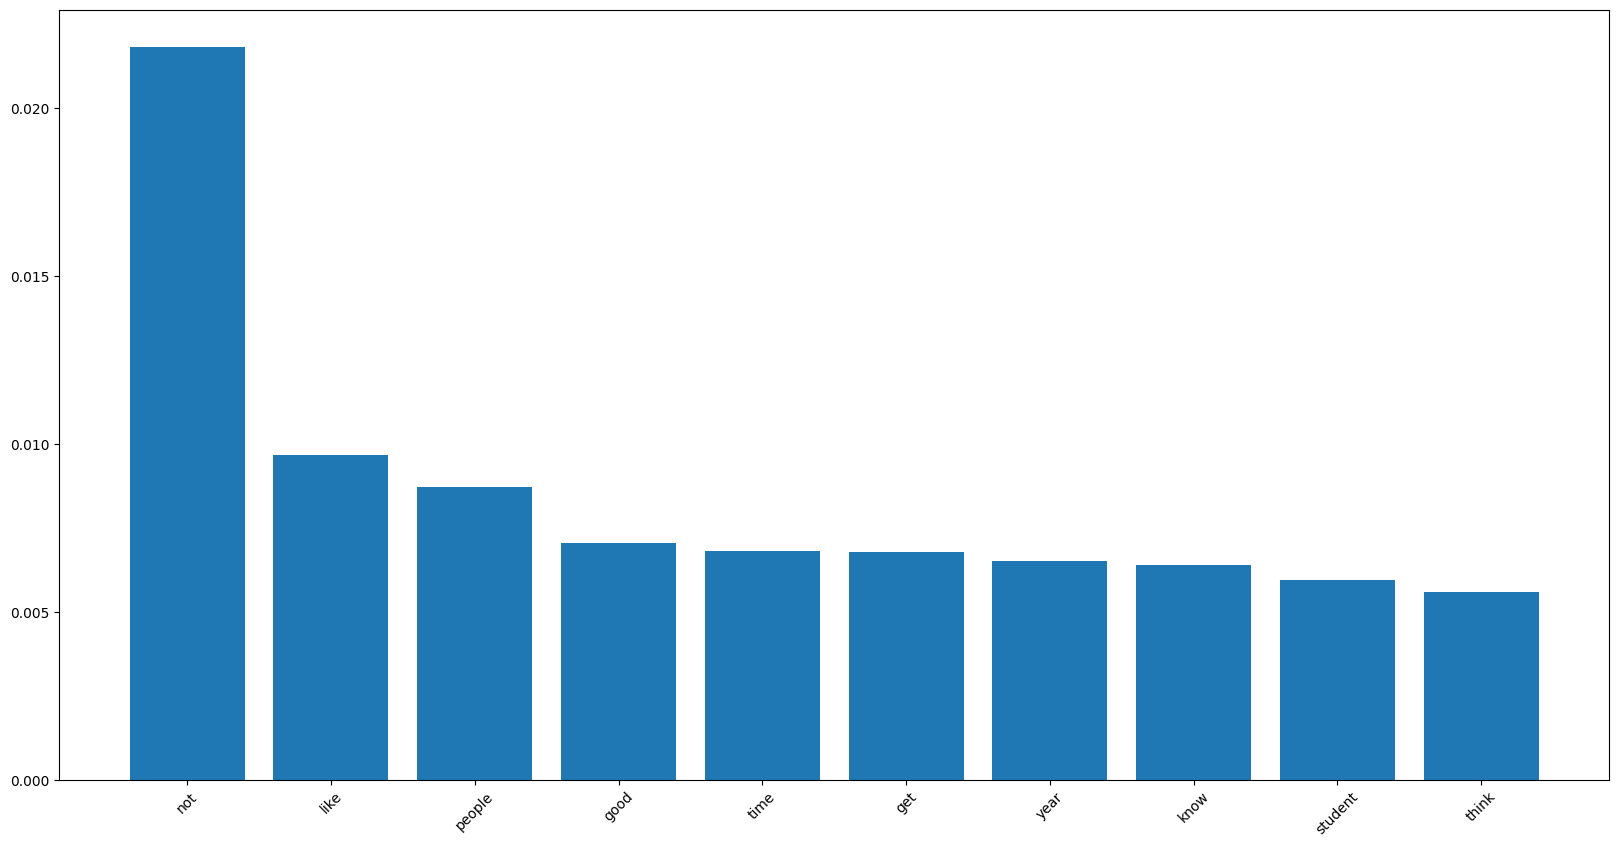

In [31]:
word_counts_uiuc2 = word_counts_uiuc2 / word_counts_uiuc2.sum()
plot_list = word_counts_uiuc2.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()


In [32]:
plot_list=word_counts_uiuc2[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000344
business            0.000543
computer science    0.000054
cs                  0.001413
computer            0.000290
dtype: float64

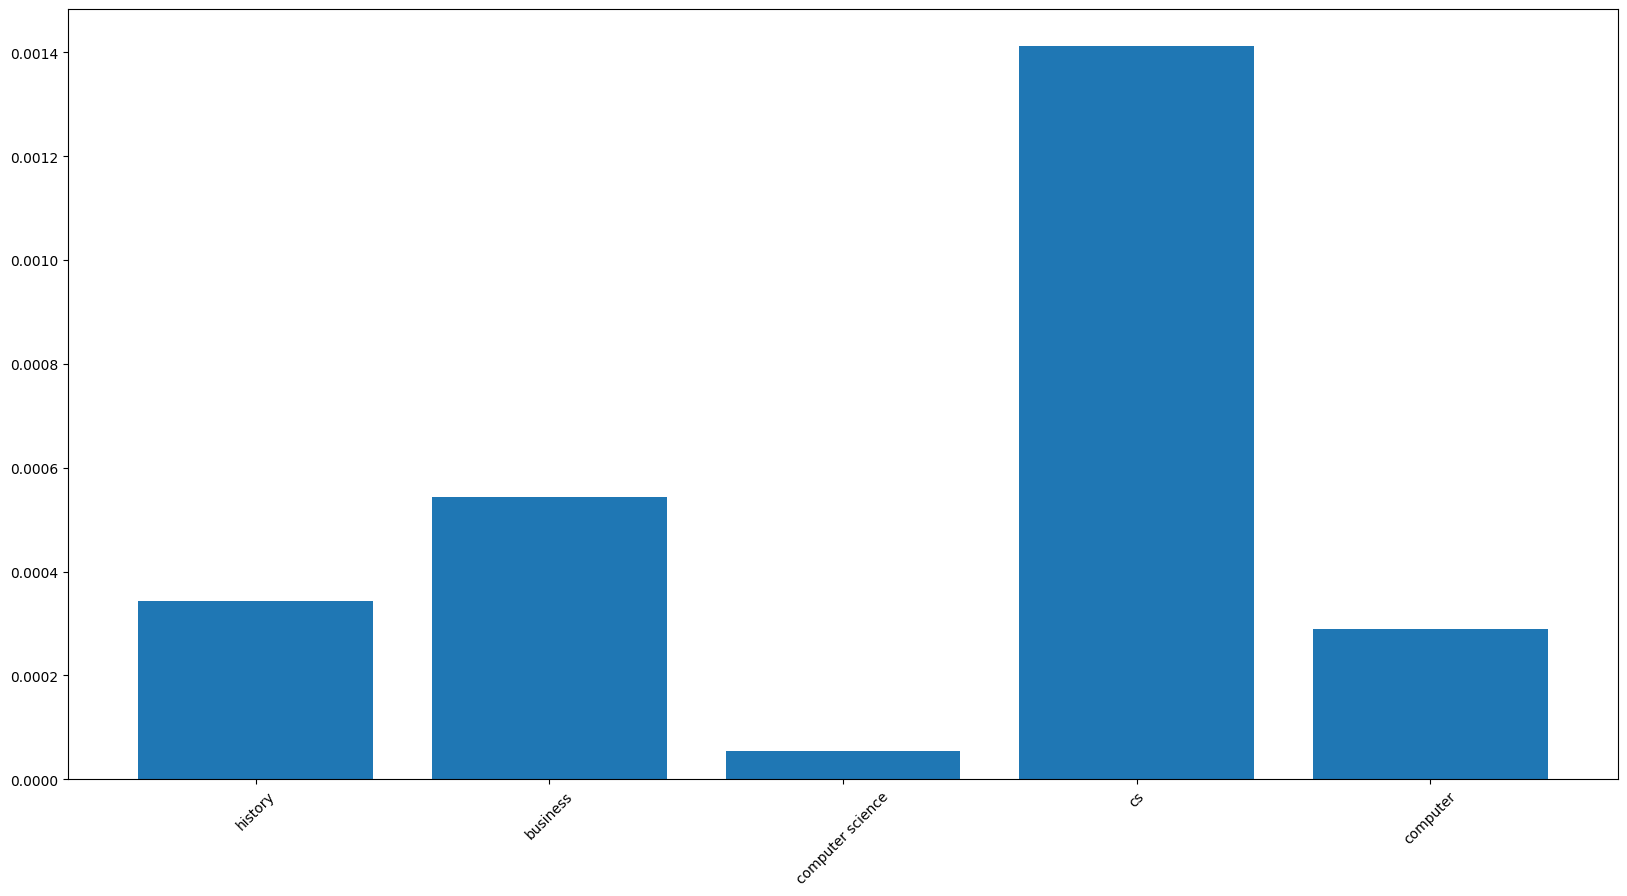

In [33]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

Interestingly, there is no huge difference based on the two graphs for Michigan subreddit and UIUC subreddit. However, when looking at the data, there is a sighlightly difference between these five common words. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [34]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [35]:
#clean and lemmatize the data csv

In [36]:
#create a bag of words representation with count vectorizer

In [37]:
#train a logistic regression model using the bag of words features as X and the label column as y

In [38]:
#report the accuracy of the model

In [39]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [40]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(lambda x: lemmatize(clean(x)))

In [41]:
#create a bag of words representation with count vectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

y = data['label']

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [43]:
#train a logistic regression model using the bag of words features as X and the label column as y
log = LogisticRegression()
log.fit(X, y)

y_pred = log.predict(X)

In [44]:
#report the accuracy of the model
accuracy = accuracy_score(y, y_pred)
accuracy

0.9046560846560846

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [45]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log2 = LogisticRegression()
log2.fit(X_train, y_train)

# Make predictions
y_pred = log2.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7222222222222222

#### Part 3: Examine the top features of your model using the following code

In [47]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [48]:
feature_names = vectorizer.get_feature_names_out()

coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': log2.coef_[0]})

coefficients = coefficients.sort_values('coefficient', ascending=False)

top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

print("Top 10 Positive Features:\n", top_10_positive)
print("\nTop 10 Negative Features:\n", top_10_negative)

Top 10 Positive Features:
          feature  coefficient
11596       uiuc     2.873580
9583         rso     2.277986
5554    illinois     2.219471
4559    grainger     2.000354
1666   champaign     1.914822
11877     urbana     1.769357
5549      illini     1.761290
2595    danville     1.756204
6336         las     1.700827
37            ac     1.516085

Top 10 Negative Features:
         feature  coefficient
12129  waitlist    -1.776914
3337        eec    -1.799657
738      august    -1.814603
565       arbor    -1.873436
11841      uofm    -1.881009
11126     texas    -1.992000
11618        um    -2.028462
11624     umich    -2.278033
4183     fresno    -2.400157
7044   michigan    -3.042641


In [49]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

The positive features present words that have high relativeness with UIUC, while negative features present words that have low relativeness with UIUC. Words like UMich and Arbor has less relativeness with uiuc, because they present another university. The top 10 positive features listed above are words closely related to UIUC. This can help to differentiate UIUC from other universities. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [61]:
import numpy as np
print(np.__version__)

1.26.4


In [59]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [53]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

#show the topics
lda_model.print_topics()

[(0,
  '0.032*"fund" + 0.032*"resume" + 0.026*"delete" + 0.023*"job" + 0.017*"depend" + 0.017*"government" + 0.014*"not" + 0.014*"post" + 0.013*"disrupt" + 0.012*"like"'),
 (1,
  '0.061*"thank" + 0.029*"project" + 0.022*"ra" + 0.019*"interested" + 0.017*"org" + 0.016*"dm" + 0.013*"student" + 0.012*"med" + 0.011*"lol" + 0.009*"school"'),
 (2,
  '0.055*"math" + 0.031*"buy" + 0.025*"look" + 0.021*"yes" + 0.016*"price" + 0.014*"pay" + 0.014*"game" + 0.011*"dm" + 0.011*"team" + 0.011*"ticket"'),
 (3,
  '0.027*"state" + 0.017*"waitlist" + 0.015*"time" + 0.013*"honor" + 0.011*"find" + 0.011*"sorority" + 0.010*"weather" + 0.010*"rush" + 0.010*"warning" + 0.010*"shut"'),
 (4,
  '0.036*"class" + 0.029*"course" + 0.028*"not" + 0.021*"take" + 0.017*"work" + 0.015*"major" + 0.015*"calc" + 0.011*"program" + 0.011*"cs" + 0.011*"lot"'),
 (5,
  '0.028*"people" + 0.026*"not" + 0.026*"friend" + 0.018*"like" + 0.016*"support" + 0.014*"year" + 0.013*"club" + 0.011*"transfer" + 0.011*"feel" + 0.011*"meet"')

In [63]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=data['cleaned_text'][30]
wrapped_string = textwrap.fill(str(toprint), width=80)
print(wrapped_string)

30
pmd 30    certainly will not difference career wise   people data science not
need gradient want learn material well sure   high teaching quality Name:
cleaned_text, dtype: object


In [55]:
lda_model.get_document_topics(corpus[30])

[(0, 0.05),
 (1, 0.05),
 (2, 0.05),
 (3, 0.05),
 (4, 0.05),
 (5, 0.05),
 (6, 0.05),
 (7, 0.05),
 (8, 0.05),
 (9, 0.05),
 (10, 0.05),
 (11, 0.05),
 (12, 0.05),
 (13, 0.05),
 (14, 0.05),
 (15, 0.05),
 (16, 0.05),
 (17, 0.05),
 (18, 0.05),
 (19, 0.05)]

In [56]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
896,0.002013,0.002013,0.002013,0.961758,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013,0.002013
1730,0.002641,0.002641,0.002641,0.949830,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641,0.002641
265,0.000670,0.000670,0.000670,0.928334,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.000670,0.059609
1437,0.004212,0.004212,0.004212,0.919968,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212,0.004212
737,0.002181,0.050779,0.002181,0.909970,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181,0.002181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,0.053134,0.044553,0.081318,0.000275,0.000275,0.013534,0.044472,0.160772,0.013068,0.098197,0.017594,0.056745,0.237860,0.051999,0.000275,0.000275,0.023453,0.042833,0.000275,0.059093
5935,0.000270,0.000270,0.000270,0.000270,0.050871,0.180159,0.000270,0.133922,0.000270,0.067159,0.040352,0.028024,0.317102,0.000270,0.000270,0.032889,0.035524,0.007324,0.104240,0.000270
2977,0.015198,0.060812,0.052487,0.000261,0.078236,0.203722,0.000261,0.071221,0.000261,0.009635,0.000261,0.011149,0.279060,0.000261,0.000261,0.114577,0.044228,0.000261,0.057591,0.000261
6751,0.008266,0.013454,0.007837,0.000259,0.000259,0.107951,0.028113,0.143303,0.000259,0.012123,0.031090,0.016735,0.451092,0.028977,0.000259,0.000259,0.040740,0.000259,0.093961,0.014802


In [66]:
print(data.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5452, 2057, 3520, 8204, 6756, 7380, 5417,  757, 5228, 2441],
      dtype='int64', length=9450)


In [67]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=data['cleaned_text'][8204]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

blue lot run pm free weekend
